In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle

# Features Description:
person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual.

    rent: The individual is currently renting a property.

    mortgage: The individual has a mortgage on the property they own.

    own: The individual owns their home outright.

    other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.

    A: The borrower has a high creditworthiness, indicating low risk.
    B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    C: The borrower's creditworthiness is moderate.
    D: The borrower is considered to have higher risk compared to previous grades.
    E: The borrower's creditworthiness is lower, indicating a higher risk.
    F: The borrower poses a significant credit risk.
    G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.

    0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
    
loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.

    Y: The individual has a history of defaults on their credit file.
    N: The individual does not have any history of defaults.
    
cb_preson_cred_hist_length: The length of credit history for the individual.

In [2]:
df = pd.read_csv("C:/Users/abukka/OneDrive - Stony Brook University/Desktop/Project/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
#Checking for null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
#checking for unique values in each columns
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

# Columns that can be categorized

In [9]:
df.loan_grade.value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [10]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [11]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [12]:
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [13]:
df.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

# Duplicate Rows

In [14]:
df.duplicated().sum()

165

In [15]:
df.drop_duplicates(inplace=True)

News Shape of data after dropping 165 dupliacted rows

In [16]:
df.shape

(32416, 12)

In [17]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [18]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [19]:
num_cols= df.select_dtypes(include=['int64', 'float64'])
num_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


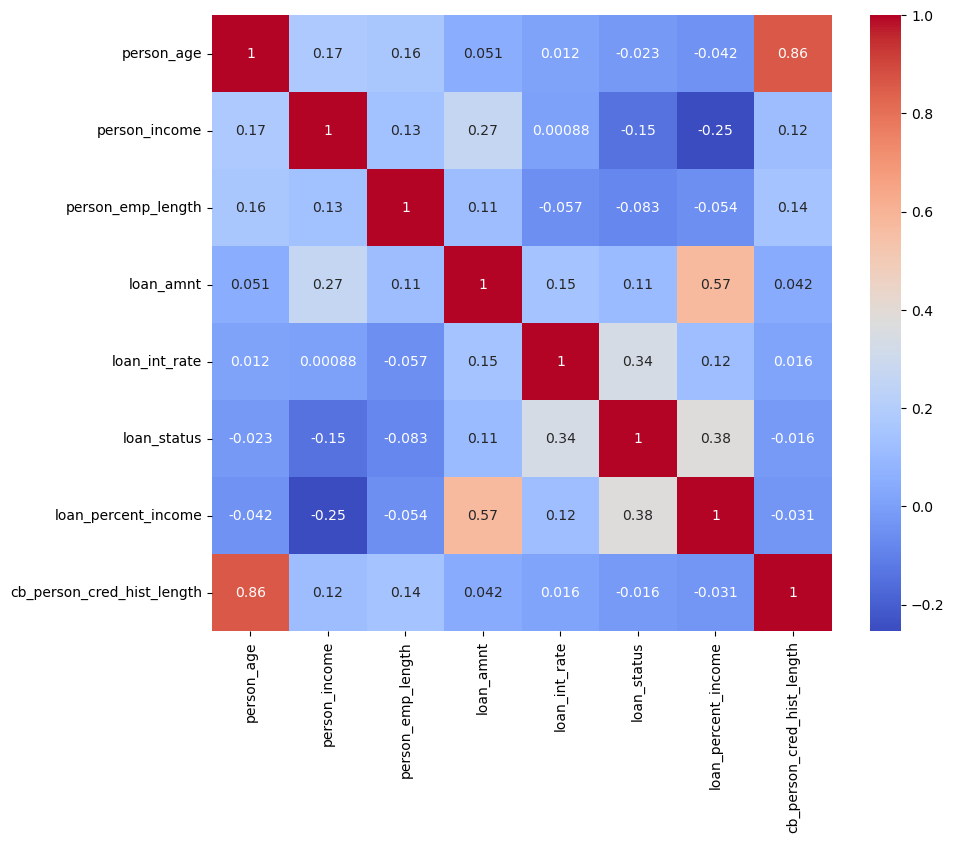

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
# Handling Missing values by removing them #axis=0 (row-wise of the columns)
df.dropna(axis=0,inplace=True)

In [24]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [25]:
# Earlier it was (32416, 12)
df.shape

(28501, 12)

# Identifying and Handling Outliers

In [26]:
outlier_age= df[df["person_age"] > 80].shape[0]
outlier_age

5

In [27]:
# Dropping Ages greater than 80
df = df[df["person_age"] < 80]
df.shape

(28495, 12)

In [28]:
# Dropping outliers for person_emp_length
outliers_emp_length = df[df['person_emp_length'] > 80].shape[0]
outliers_emp_length

2

In [29]:
df = df[df['person_emp_length'] <= 80]
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28493.000000,2.849300e+04,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000,28493.000000
mean,27.719721,6.642956e+04,4.781771,9657.454462,11.045321,0.217141,0.169522,5.799003
std,6.160631,5.151527e+04,4.038045,6327.910405,3.230829,0.412307,0.106381,4.037901
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.599200e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,78.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [30]:
df.shape

(28493, 12)

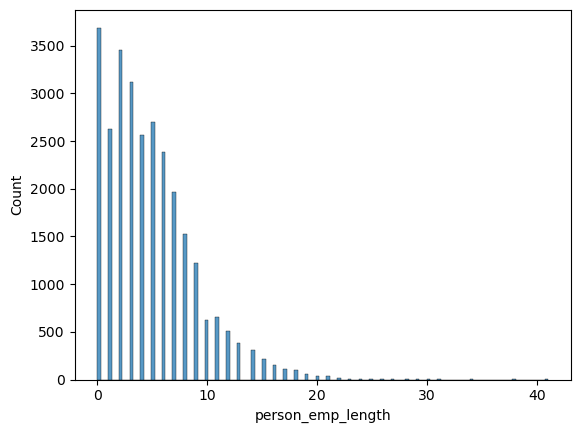

In [31]:
sns.histplot(data= df, x='person_emp_length')
plt.show()

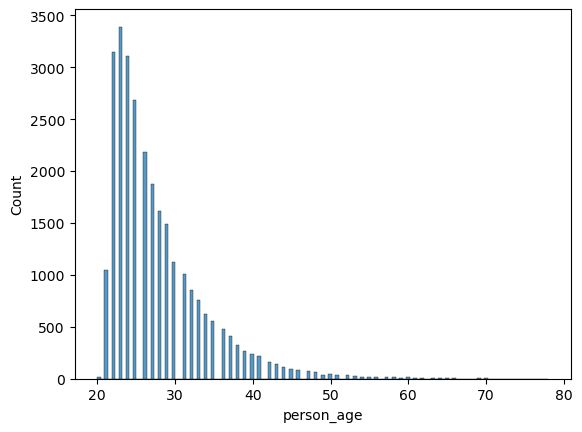

In [32]:
sns.histplot(data= df, x='person_age')
plt.show()

# Feature Engineering

In [33]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,54,120000,4.0,17625,7.49,0,0.15,19,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,65,76000,3.0,35000,10.99,1,0.46,28,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,56,150000,5.0,15000,11.48,0,0.10,26,False,False,...,False,True,False,True,False,False,False,False,False,False


In [34]:
df.columns.tolist()

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'loan_grade_B',
 'loan_grade_C',
 'loan_grade_D',
 'loan_grade_E',
 'loan_grade_F',
 'loan_grade_G',
 'cb_person_default_on_file_Y']

In [35]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [36]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


In [37]:
df[numerical_cols]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,-1.090771,-1.103179,0.054044,-1.368162,0.029305,-0.653524,-0.940853
2,-0.441476,-1.103179,-0.936552,-0.657014,0.564781,3.764618,-0.693195
3,-0.766123,-0.018045,-0.193605,4.004954,1.295256,3.388606,-0.940853
4,-0.603799,-0.233519,0.796991,4.004954,0.998114,3.576612,-0.445537
5,-1.090771,-1.097355,-0.688903,-1.131113,-1.208788,0.756521,-0.940853
...,...,...,...,...,...,...,...
32576,4.752888,-0.260695,-0.936552,-0.609604,0.654543,-0.559521,5.993565
32577,4.265917,1.039912,-0.193605,1.259134,-1.100455,-0.183509,3.269330
32578,6.051479,0.185782,-0.441254,4.004954,-0.017123,2.730584,5.498250
32579,4.590564,1.622274,0.054044,0.844298,0.134543,-0.653524,5.002934


In [38]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,-1.090771,-1.103179,0.054044,-1.368162,0.029305,0,-0.653524,-0.940853,False,True,...,False,False,False,True,False,False,False,False,False,False
2,-0.441476,-1.103179,-0.936552,-0.657014,0.564781,1,3.764618,-0.693195,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.766123,-0.018045,-0.193605,4.004954,1.295256,1,3.388606,-0.940853,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.603799,-0.233519,0.796991,4.004954,0.998114,1,3.576612,-0.445537,False,False,...,True,False,False,False,True,False,False,False,False,True
5,-1.090771,-1.097355,-0.688903,-1.131113,-1.208788,1,0.756521,-0.940853,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.752888,-0.260695,-0.936552,-0.609604,0.654543,0,-0.559521,5.993565,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,4.265917,1.039912,-0.193605,1.259134,-1.100455,0,-0.183509,3.269330,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,6.051479,0.185782,-0.441254,4.004954,-0.017123,1,2.730584,5.498250,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,4.590564,1.622274,0.054044,0.844298,0.134543,0,-0.653524,5.002934,False,False,...,False,True,False,True,False,False,False,False,False,False


In [39]:
columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numeric_features = ['person_age', 'person_income', 'loan_amnt']

# Model Building

In [40]:
# Split the data into features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [41]:
# Save the feature names
feature_names = X.columns.tolist()

# Save feature names to a file
import pickle
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Feature names saved.")

Feature names saved.


In [42]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# Import necessary libraries for the mentioned models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [44]:
# List of models
models = {
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Here are the top 3 performers with brief explanations:


1. **Random Forest**
Accuracy: 93.2%
Precision: 96.7%
ROC AUC: 93.4%
Reason: Strong overall performance with high precision and balanced recall, suitable for diverse datasets.

2. **Bagging Classifier**
Accuracy: 93.1%
Precision: 95.4%
ROC AUC: 91.4%
Reason: Provides robust accuracy with good generalization, reducing variance by averaging multiple models.

3. **Gradient Boosting**
Accuracy: 92.5%
Precision: 93.9%
ROC AUC: 92.8%
Reason: Effective at capturing complex patterns, with good balance across all metrics.

In [45]:
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Support Vector Machine  0.914897   0.942726  0.654213  0.772407  0.902668
K-Nearest Neighbors     0.891911   0.830247  0.641494  0.723767  0.866750
Decision Tree           0.886471   0.732673  0.764706  0.748347  0.842835
Logistic Regression     0.870153   0.790359  0.560413  0.655814  0.878574
Random Forest           0.933146   0.965005  0.723370  0.826897  0.932072
AdaBoost                0.883313   0.788705  0.643879  0.708972  0.898981
Bagging Classifier      0.929110   0.941116  0.724165  0.818509  0.914798
Extra Trees             0.918758   0.927879  0.685215  0.788294  0.919698
Gradient Boosting       0.925075   0.939683  0.705882  0.806173  0.927778


In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
import pickle
# Save the model to a pickle file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as 'rf_model.pkl'")

Model saved as 'rf_model.pkl'


In [48]:
!pip install shap
!pip install lime

In [49]:
import shap
shap.initjs()



In [183]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)


In [182]:
print("shap_values shape:", shap_values.shape)


shap_values shape: (1, 22, 2)


In [52]:
# Save the SHAP explainer to a pickle file
with open('shap_explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)

print("SHAP explainer saved to 'shap_explainer.pkl'")

SHAP explainer saved to 'shap_explainer.pkl'


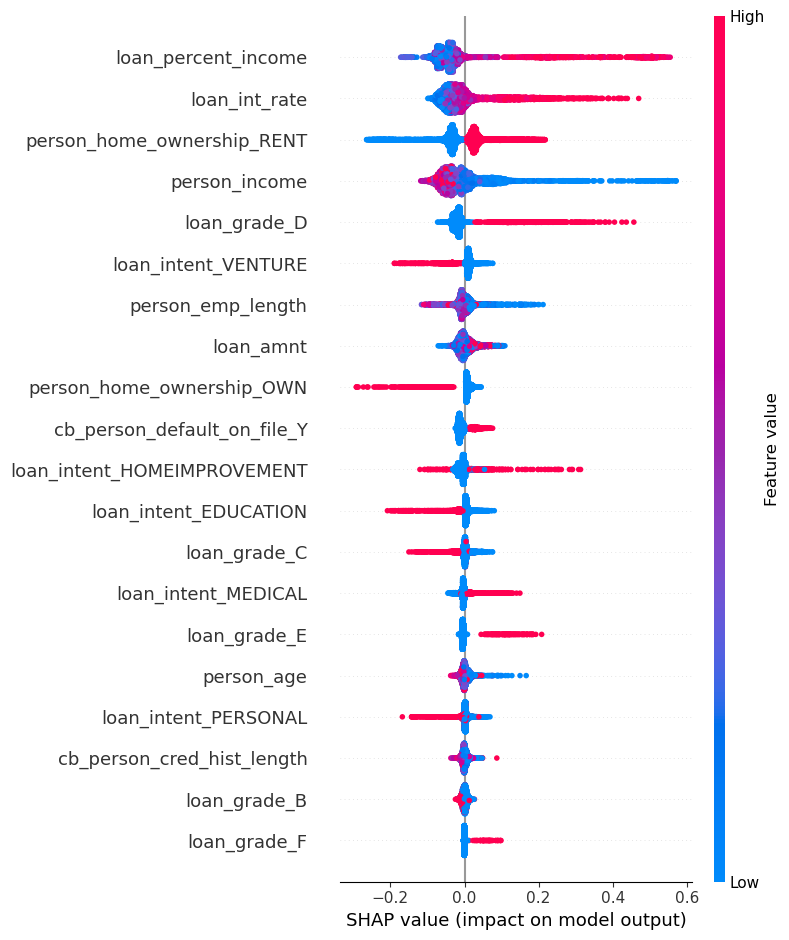

In [198]:
#Summary plot
shap.summary_plot(shap_values[:, :, 1], X_test) 

In [54]:
print(np.array(shap_values).shape)


(5699, 22, 2)


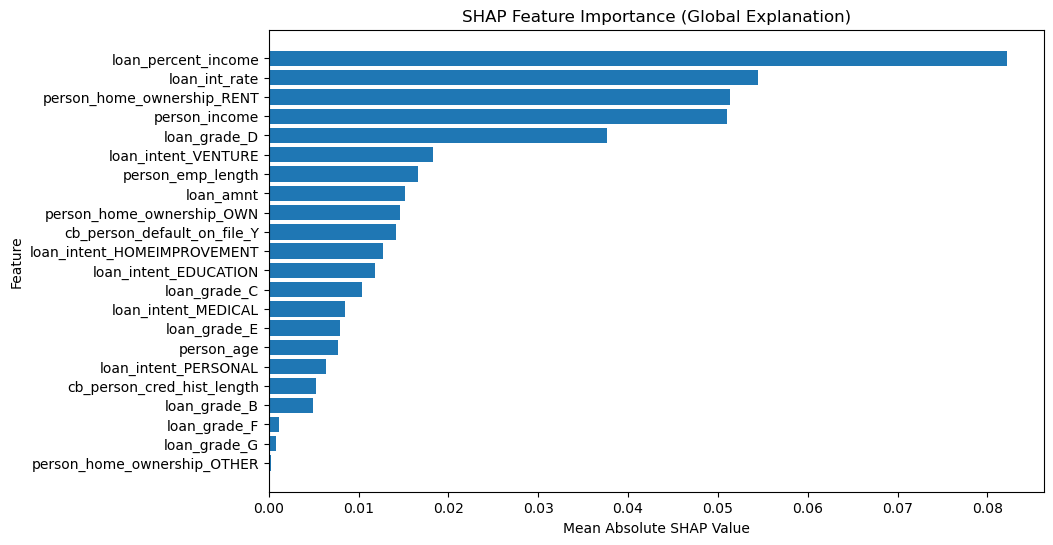

In [55]:
#SHAP Global Explanation
# Calculate mean absolute SHAP values for each feature
# Combine SHAP values across all classes
mean_abs_shap_values = np.abs(shap_values).mean(axis=0).mean(axis=-1)
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,  # Assuming X_test is a DataFrame
    'Mean Absolute SHAP Value': mean_abs_shap_values
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Mean Absolute SHAP Value'])
plt.gca().invert_yaxis()
plt.title('SHAP Feature Importance (Global Explanation)')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.show()


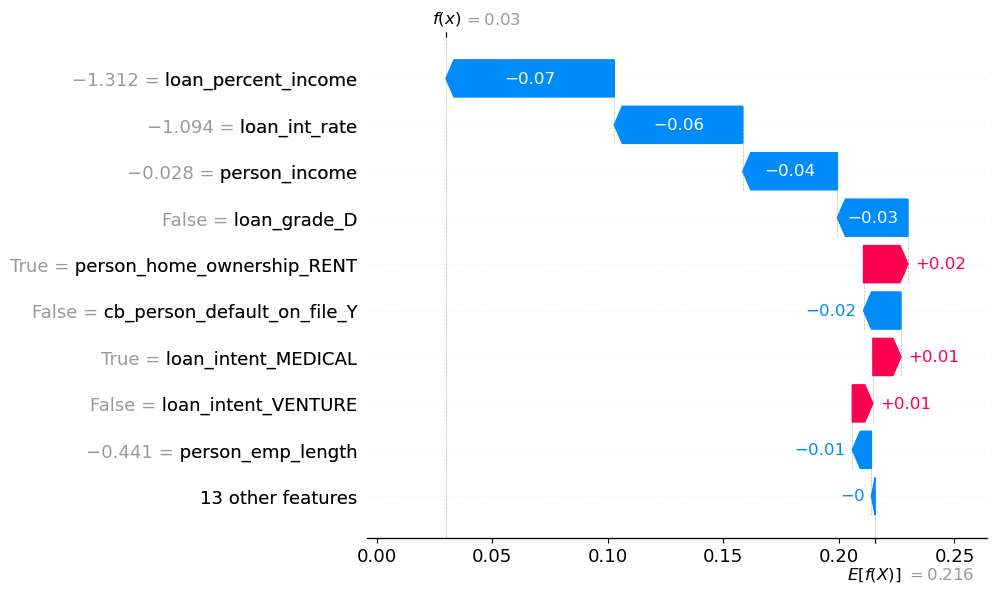

In [56]:
# Shap Local Shap explanation for a sample index
import matplotlib.pyplot as plt

sample_index=2
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[sample_index, :, 1],  # SHAP values for the specific sample and class
        base_values=explainer.expected_value[1],  # Base value for class 1
        data=X_test.iloc[sample_index, :],  # Feature values for the sample
        feature_names=X_test.columns.tolist()  # Feature names
    )
)


In [57]:
# Extract SHAP values and feature contributions for a single prediction
shap_values_sample = shap_values[sample_index, :, 1]
features_sample = X_test.iloc[sample_index, :]
contributions = pd.DataFrame({
    "Feature": X_test.columns,
    "Value": features_sample,
    "SHAP Value": shap_values_sample
}).sort_values("SHAP Value", ascending=False)

print(contributions)


                                                 Feature     Value  SHAP Value
person_home_ownership_RENT    person_home_ownership_RENT      True    0.019241
loan_intent_MEDICAL                  loan_intent_MEDICAL      True    0.012168
loan_intent_VENTURE                  loan_intent_VENTURE     False    0.008909
person_home_ownership_OWN      person_home_ownership_OWN     False    0.005013
cb_person_cred_hist_length    cb_person_cred_hist_length -0.940853    0.004678
loan_intent_EDUCATION              loan_intent_EDUCATION     False    0.004517
loan_grade_C                                loan_grade_C     False    0.001591
person_home_ownership_OTHER  person_home_ownership_OTHER     False   -0.000029
loan_grade_G                                loan_grade_G     False   -0.000376
loan_intent_PERSONAL                loan_intent_PERSONAL     False   -0.000381
loan_grade_F                                loan_grade_F     False   -0.000715
loan_grade_B                                loan_gra

In [58]:
import lime
import lime.lime_tabular

C:\Users\abukka\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


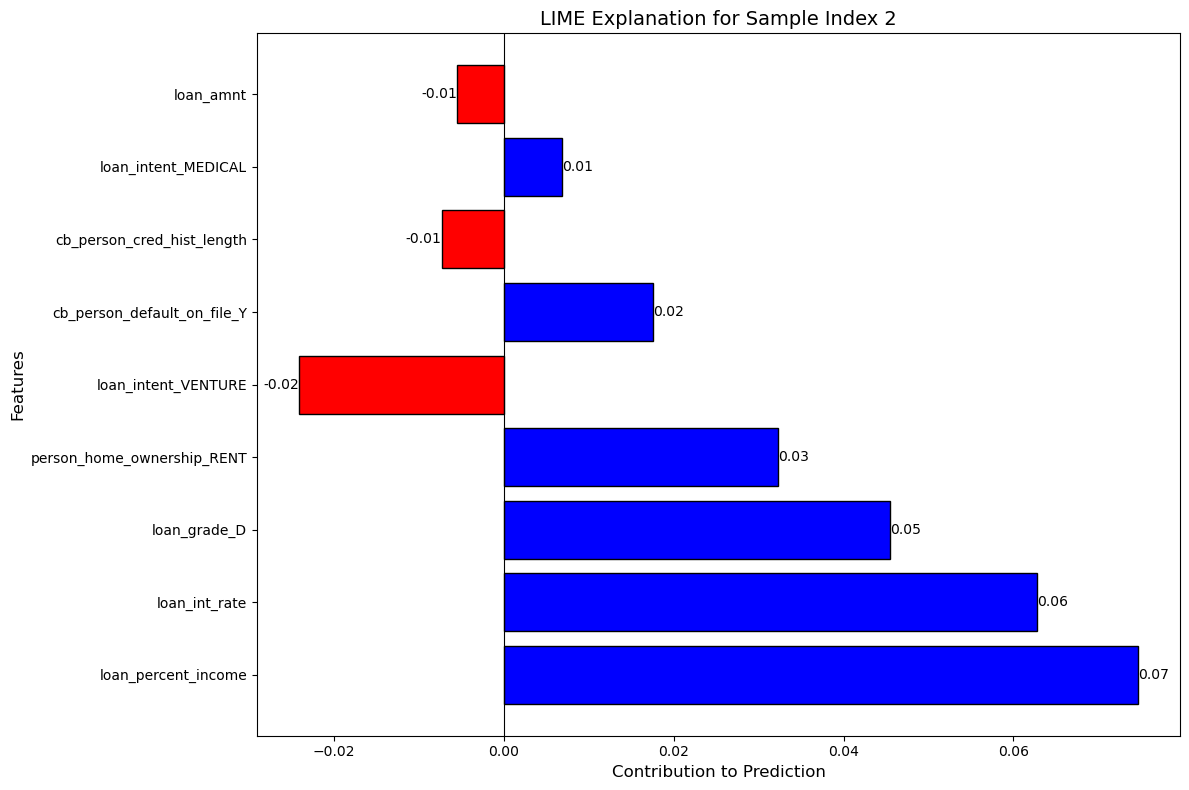

[('loan_percent_income', 0.07466728476704607), ('loan_int_rate', 0.06277710457310437), ('loan_grade_D', 0.045518745236381365), ('person_home_ownership_RENT', 0.0323097152394613), ('loan_intent_VENTURE', -0.024105054645102153), ('cb_person_default_on_file_Y', 0.017592175497067073), ('cb_person_cred_hist_length', -0.007324311676109777), ('loan_intent_MEDICAL', 0.006826130032396485), ('loan_amnt', -0.005465683698358983)]


In [59]:
# Lime Local Explanation for a sample Index
from lime.lime_tabular import LimeTabularExplainer

sample_index = 2

# Define feature names
feature_names = X_train.columns.tolist()

# Create a LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=["Class 0", "Class 1"],
    mode="classification",
    discretize_continuous=False
)

# Select the sample
sample = X_test.iloc[sample_index, :].values

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=rf_model.predict_proba,
    num_features=9
)

# Extract feature contributions
exp_map = lime_exp.as_list()
features, contributions = zip(*exp_map)

# Visualize the explanation as a bar chart
plt.figure(figsize=(12, 8))
colors = ['red' if c < 0 else 'blue' for c in contributions]
bars = plt.barh(features, contributions, color=colors, edgecolor="black")

# Add values to the bars
for bar, contribution in zip(bars, contributions):
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f'{contribution:.2f}',
        ha='left' if contribution > 0 else 'right',
        va='center',
        fontsize=10
    )

# Add labels and title
plt.xlabel("Contribution to Prediction", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title(f"LIME Explanation for Sample Index {sample_index}", fontsize=14)
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

print(exp_map)


C:\Users\abukka\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


                        Feature  SHAP Value  LIME Value
0                    person_age   -0.002073   -0.005775
1                 person_income   -0.040940   -0.130207
2             person_emp_length   -0.008286   -0.006747
3                     loan_amnt   -0.003163   -0.005633
4                 loan_int_rate   -0.055599    0.055627
5           loan_percent_income   -0.072838    0.077193
6    cb_person_cred_hist_length    0.004678   -0.002704
7   person_home_ownership_OTHER   -0.000029   -0.005623
8     person_home_ownership_OWN    0.005013   -0.005261
9    person_home_ownership_RENT    0.019241    0.027028
10        loan_intent_EDUCATION    0.004517   -0.009239
11  loan_intent_HOMEIMPROVEMENT   -0.003088    0.015536
12          loan_intent_MEDICAL    0.012168    0.008425
13         loan_intent_PERSONAL   -0.000381   -0.009193
14          loan_intent_VENTURE    0.008909   -0.020677
15                 loan_grade_B   -0.001052   -0.008178
16                 loan_grade_C    0.001591   -0

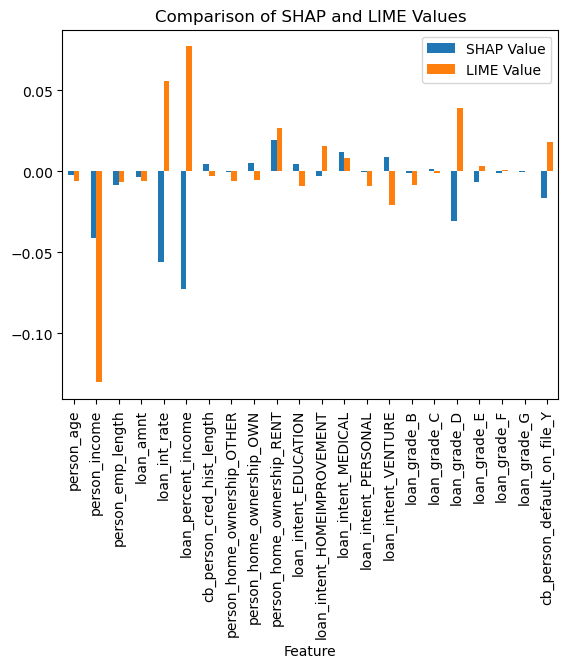

In [193]:
# Verify sample shape comparison of SHAP and LIME Values
sample_index = 2
sample = X_test.iloc[sample_index, :].values.flatten()

# SHAP Values
shap_feature_importances = dict(zip(X_test.columns, shap_values[sample_index, :, 1]))

# Create a LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=["Class 0", "Class 1"],
    mode="classification",
    discretize_continuous=False
)


sample = X_test.iloc[sample_index, :].values

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=rf_model.predict_proba,
    num_features=22
)
#lime_exp.show_in_notebook()
# Extract LIME feature importances
lime_feature_importances = dict(lime_exp.as_list())


# Compare SHAP and LIME
comparison_df = pd.DataFrame({
    "Feature": list(shap_feature_importances.keys()),
    "SHAP Value": list(shap_feature_importances.values()),
    "LIME Value": [lime_feature_importances.get(feat, 0) for feat in shap_feature_importances.keys()]
})

# Print and visualize comparison
print(comparison_df)
comparison_df.plot(kind='bar', x='Feature', title='Comparison of SHAP and LIME Values')
plt.show()


In [185]:
#Correlation between shap and Lime
correlation = comparison_df['SHAP Value'].corr(comparison_df['LIME Value'])
print("Correlation between SHAP and LIME values:", correlation)


Correlation between SHAP and LIME values: -0.23028166889476265


## Why SHAP is the Better Choice:


**Global and Local Analysis**: SHAP effectively combines global and local explanations in one framework, making it a comprehensive tool for credit risk assessment.

**Trust and Transparency**: SHAP’s consistency, fairness, and alignment with domain knowledge ensure stakeholders can trust the model’s outputs.

**Feature Importance Insights**: SHAP identified person_income, person_emp_length, and cb_person_cred_hist_length as the most important features, providing actionable insights for improving loan approval strategies.

**Conclusion**: Given its consistency, robustness, and ability to explain both global and local trends effectively, SHAP is clearly the superior choice for your credit risk assessment project. While LIME can provide quick local explanations, its variability and lack of global perspective make it less suitable for credit risk analysis.

## SHAP-Based Loan Decision Explanation for a Sample Input

In [199]:

numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Encoding to original mapping for feature interpretation
encoded_to_original_mapping = {
    'cb_person_default_on_file_Y': 'cb_person_default_on_file',
    'person_home_ownership_RENT': 'person_home_ownership',
    'person_home_ownership_OWN': 'person_home_ownership',
    'person_home_ownership_MORTGAGE': 'person_home_ownership',
    'person_home_ownership_OTHER': 'person_home_ownership',

    'loan_intent_EDUCATION': 'loan_intent',
    'loan_intent_PERSONAL': 'loan_intent',
    'loan_intent_HOMEIMPROVEMENT': 'loan_intent',
    'loan_intent_MEDICAL': 'loan_intent',
    'loan_intent_DEBTCONSOLIDATION': 'loan_intent',
    'loan_intent_VENTURE': 'loan_intent',

    'loan_grade_A': 'loan_grade',
    'loan_grade_B': 'loan_grade',
    'loan_grade_C': 'loan_grade',
    'loan_grade_D': 'loan_grade',
    'loan_grade_E': 'loan_grade',
    'loan_grade_F': 'loan_grade'
}


# Function to map UI inputs to dummy variables with True/False values
def map_ui_to_dummies(input_data):
    """
    Converts UI input features into dummy-encoded columns using True/False values, consistent with training.
    """
    # Initialize the dummy-encoded dictionary
    encoded_data = {}

    # Manual encoding for 'person_home_ownership'
    ownership_mapping = ['OTHER', 'OWN', 'RENT']
    for value in ownership_mapping:
        encoded_data[f'person_home_ownership_{value}'] = input_data['person_home_ownership'] == value

    # Manual encoding for 'loan_intent'
    loan_intent_mapping = ['EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
    for value in loan_intent_mapping:
        encoded_data[f'loan_intent_{value}'] = input_data['loan_intent'] == value

    # Manual encoding for 'loan_grade'
    loan_grade_mapping = ['B', 'C', 'D', 'E', 'F', 'G']
    for value in loan_grade_mapping:
        encoded_data[f'loan_grade_{value}'] = input_data['loan_grade'] == value

    # Manual encoding for 'cb_person_default_on_file'
    encoded_data['cb_person_default_on_file_Y'] = input_data['cb_person_default_on_file'] == 'Y'

    # Include the original numerical columns as is
    for key, value in input_data.items():
        if key not in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
            encoded_data[key] = value

    return encoded_data


def get_suggestion_for_improvement(feature, input_data):
    """
    Provide a detailed suggestion for improving a specific feature based on the original input value.
    """
    suggestions = {
        'person_age': "Your age indicates your financial maturity. Lenders often look for a stable financial history as you grow older. Focus on building a consistent credit record and demonstrating responsible financial behavior.",
        
        'person_income': "Your income is a key factor in assessing your ability to repay the loan. Consider increasing your income by exploring higher-paying job opportunities, negotiating a raise, or adding additional sources of income.",
        
        'person_emp_length': "Lenders value job stability when evaluating creditworthiness. Try to maintain consistent employment, ideally for 2 years or more, as it demonstrates reliability and financial stability.",
        
        'loan_amnt': "The loan amount you are requesting appears high compared to your financial profile. Consider requesting a smaller loan amount or increasing your income to reduce the financial risk associated with this loan.",
        
        'loan_int_rate': "The interest rate on your loan indicates higher risk to the lender. Improve your credit score or shop around for lenders offering better rates. Demonstrating better financial stability can also help lower this rate.",
        
        'loan_percent_income': "The percentage of your income that the loan represents is too high. Reduce the loan amount or work to increase your income, so the loan becomes a smaller portion of your financial obligations.",
        
        'cb_person_cred_hist_length': "Your credit history length impacts your perceived reliability. Build a longer credit history by responsibly using credit over time and ensuring you have no missed payments.",
        
        'cb_person_default_on_file_Y': {
            'Y': "A past default on your credit file raises red flags for lenders. Focus on clearing any outstanding defaults, repaying your debts on time, and rebuilding your credit profile through consistent financial discipline.",
            'N': "Your record of no defaults is a positive factor. Continue demonstrating financial responsibility to maintain your strong credit profile."
        },
        
        # Home ownership categories
        'person_home_ownership_RENT': "Renting can indicate less financial stability than owning a home. Consider transitioning to home ownership, which demonstrates greater financial commitment and stability.",
        'person_home_ownership_MORTGAGE': "Having a mortgage is a positive sign, but timely payments are crucial. Ensure you maintain regular payments to improve your creditworthiness.",
        'person_home_ownership_OWN': "Owning your home outright is a strong indicator of financial stability. Continue managing property-related expenses responsibly to maintain your profile.",
        'person_home_ownership_OTHER': "Unusual or less common home ownership types can be perceived as higher risk. Ensure stable living arrangements and demonstrate consistency in managing housing-related finances.",
        
        # Loan intent categories
        'loan_intent_EDUCATION': "Loans for education are viewed positively if they improve your earning potential. Provide a clear plan showing how the loan will help achieve higher income or better career prospects.",
        'loan_intent_PERSONAL': "Personal loans can indicate higher financial risk. Demonstrate responsible financial planning and ensure the loan has a specific, well-justified purpose.",
        'loan_intent_HOMEIMPROVEMENT': "Loans for home improvement are often seen as investments. Highlight how the loan will increase property value or livability to reassure lenders of its utility.",
        'loan_intent_MEDICAL': "Medical loans are necessary but can indicate financial strain. Show evidence of stable financial planning for medical expenses to reassure lenders of your repayment ability.",
        'loan_intent_DEBTCONSOLIDATION': "Debt consolidation loans can simplify debt management but require a clear repayment plan. Show how consolidating debt will improve your financial situation and enable easier repayment.",
        'loan_intent_VENTURE': "Loans for ventures can be risky. Provide a strong, detailed business plan, including projected returns, to build confidence in your ability to repay the loan.",
        
        # Loan grades
        'loan_grade_A': "Your loan grade indicates low risk. Maintain your current financial habits to secure favorable terms in future loans.",
        'loan_grade_B': "Your loan grade is relatively low risk but could improve. Focus on enhancing your credit score and reducing any outstanding debts to reach Grade A.",
        'loan_grade_C': "Your loan grade indicates moderate risk. Reduce outstanding debts, improve your credit score, and demonstrate consistent financial discipline to improve your grade.",
        'loan_grade_D': "Your loan grade shows higher risk. Focus on increasing your income, reducing your debt-to-income ratio, and improving your overall financial stability.",
        'loan_grade_E': "Your loan grade reflects significant risk. Address key financial issues by repaying debts, increasing income, and rebuilding your creditworthiness over time.",
        'loan_grade_F': "Your loan grade indicates the highest risk level. Take immediate steps to address defaults, reduce debt, and demonstrate responsible financial management to improve your credit profile."
    }

    # Map encoded feature back to original value
    if feature in encoded_to_original_mapping:
        original_feature = encoded_to_original_mapping[feature]
        original_value = input_data.get(original_feature, None)
        if isinstance(suggestions.get(feature), dict):
            return suggestions[feature].get(original_value, "Work on improving this factor to enhance your loan eligibility.")
    return suggestions.get(feature, "Work on improving this factor to enhance your loan eligibility.")


def create_prompt(status, positive_factors, negative_factors, feature_values, input_data):
    feature_descriptions = {
        # Updated feature descriptions
        'person_age': "Age of the individual applying for the loan.",
        'person_income': "Annual income of the individual.",
    }

    prompt = f"The loan application has been **{status}**. Below is the detailed analysis:\n\n"
  # Add SHAP analysis for negative factors (reasons for rejection)
    if status == "rejected":
        prompt += "**Reasons for Rejection:**\n"
        for idx, (feature, impact) in enumerate(negative_factors.items(), start=1):
            description = feature_descriptions.get(feature, "Description not available.")
            value = feature_values.loc[0, feature] if feature in feature_values else "Value not available"
            prompt += f"{idx}. **{feature} **: This factor negatively impacted your application.\n"
            prompt += f"   - Feature description: {description}\n"

    # Add SHAP analysis for positive factors (key factors for approval)
    if status == "approved":
        prompt += "**Positive Factors:**\n"
        for idx, (feature, impact) in enumerate(positive_factors.items(), start=1):
            description = feature_descriptions.get(feature, "Description not available.")
            value = feature_values.loc[0, feature] if feature in feature_values else "Value not available"
            prompt += f"{idx}. **{feature} **: This factor positively influenced your application.\n"
            prompt += f"   - Feature description: {description}\n"
        
    if status == "rejected":
        prompt += "**Suggestion for Improvement:**\n"
        for idx, (feature, impact) in enumerate(negative_factors.items(), start=1):
            prompt += f"{idx}. {get_suggestion_for_improvement(feature, input_data)}\n"

    return prompt


def generate_loan_decision_explanation(user_data, rf_model, explainer):
    user_data_df = pd.DataFrame(user_data, index=[0])
    y_pred = rf_model.predict(user_data_df)
    shap_values = explainer.shap_values(user_data_df)

    shap_values_user = shap_values[0, :, y_pred[0]]
    feature_impact = pd.Series(shap_values_user, index=user_data_df.columns).sort_values(ascending=False)

    positive_factors = feature_impact[feature_impact > 0].head(3)
    negative_factors = feature_impact[feature_impact < 0].tail(3)

    return create_prompt("approved" if y_pred[0] == 1 else "rejected", positive_factors, negative_factors, user_data_df, user_data)


# Example usage
input_data = {
    'person_age': 40,
    'person_income': 48398,
    'person_home_ownership': 'OWN',
    'person_emp_length': 7,
    'loan_intent': 'MEDICAL',
    'loan_grade': 'B',
    'loan_amnt': 27041,
    'loan_int_rate': 6.54,
    'loan_percent_income': 0.3,
    'cb_person_default_on_file': 'N',
    'cb_person_cred_hist_length': 12
}

encoded_input = map_ui_to_dummies(input_data)
user_data_df = pd.DataFrame([encoded_input], columns=feature_names)
user_data_df[numerical_cols] = scaler.transform(user_data_df[numerical_cols])
shap_explainer = shap.TreeExplainer(rf_model)
explanation = generate_loan_decision_explanation(user_data_df, rf_model, shap_explainer)

print(explanation)


The loan application has been **rejected**. Below is the detailed analysis:

**Reasons for Rejection:**
1. **person_income **: This factor negatively impacted your application.
   - Feature description: Annual income of the individual.
2. **loan_intent_MEDICAL **: This factor negatively impacted your application.
   - Feature description: Description not available.
3. **loan_amnt **: This factor negatively impacted your application.
   - Feature description: Description not available.
**Suggestion for Improvement:**
1. Your income is a key factor in assessing your ability to repay the loan. Consider increasing your income by exploring higher-paying job opportunities, negotiating a raise, or adding additional sources of income.
2. Medical loans are necessary but can indicate financial strain. Show evidence of stable financial planning for medical expenses to reassure lenders of your repayment ability.
3. The loan amount you are requesting appears high compared to your financial profile.

In [202]:
# Calculate SHAP values for the input data
user_data_df = pd.DataFrame(user_data_df, index=[0])
y_pred = rf_model.predict(user_data_df)
shap_values = explainer.shap_values(user_data_df)
shap_values_user = shap_values[0, :, y_pred[0]]


# Combine feature names, values, and SHAP contributions
contributions = pd.DataFrame({
    "Feature": user_data_df.columns,
    "Value": user_data_df.iloc[0],
    "SHAP Value": shap_values_user
}).sort_values("SHAP Value", ascending=False)

# Display the contributions for analysis
print(contributions)


                                                 Feature     Value  SHAP Value
person_home_ownership_OWN      person_home_ownership_OWN      True    0.081696
person_home_ownership_RENT    person_home_ownership_RENT     False    0.054902
loan_int_rate                              loan_int_rate -1.394502    0.051239
loan_grade_D                                loan_grade_D     False    0.013555
cb_person_default_on_file_Y  cb_person_default_on_file_Y     False    0.010578
cb_person_cred_hist_length    cb_person_cred_hist_length  1.535725    0.006809
loan_grade_E                                loan_grade_E     False    0.006218
person_emp_length                      person_emp_length  0.549342    0.006037
loan_percent_income                  loan_percent_income  1.226536    0.003765
loan_grade_C                                loan_grade_C     False    0.003065
person_age                                    person_age  1.993383    0.001761
loan_intent_HOMEIMPROVEMENT  loan_intent_HOMEIMPROVE

In [203]:
force_plot_data = shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_user,
    features=user_data_df.iloc[0],
    feature_names=user_data_df.columns.tolist()
)
force_plot_data


Accuracy: 0.93
Precision: 0.96
Recall: 0.72
F1 Score: 0.83
ROC-AUC Score: 0.94


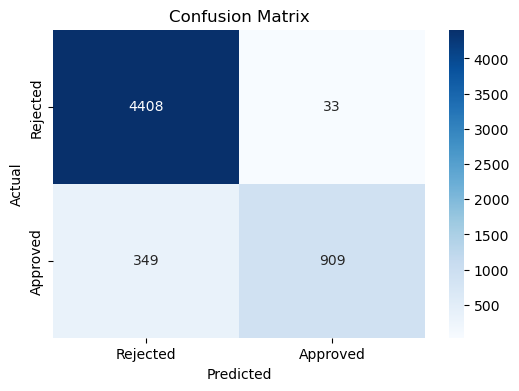

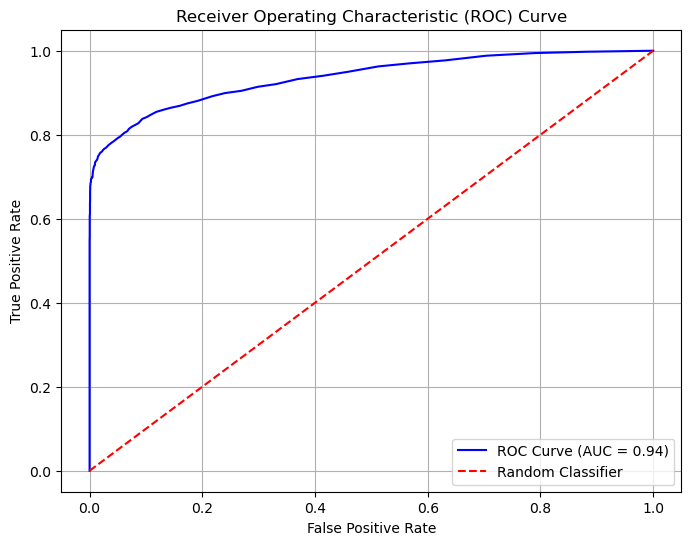

In [63]:
# Comapring Effectiveness of the system
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf_model.predict(X_test)  # Predicted class labels
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# 1. Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# 2. Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()
